# goals
* explore the mismatch between lensed, RP and NP waveforms
* explore the conditions for indistinguishable waveforms

# import modules

In [1]:
import sys

sys.path.insert(0, "../")
from modules.functions_ver2 import *
from modules.plot_utils import *

# assign params

In [11]:
def_td = 0.03
def_I = 0.5
def_y = get_y_from_I(def_I)
def_MLz = get_MLz_from_td(def_td, def_y)
print(def_y, def_MLz)

lens_params_1["y"] = def_y
lens_params_1["MLz"] = def_MLz * solar_mass
lens_params_1, RP_params_1, NP_params_1 = set_to_location(
    loc_params["Taman"]["faceon"], lens_params_1, RP_params_1, NP_params_1
)

0.34831069974900647 2174.547084457945


# lensing

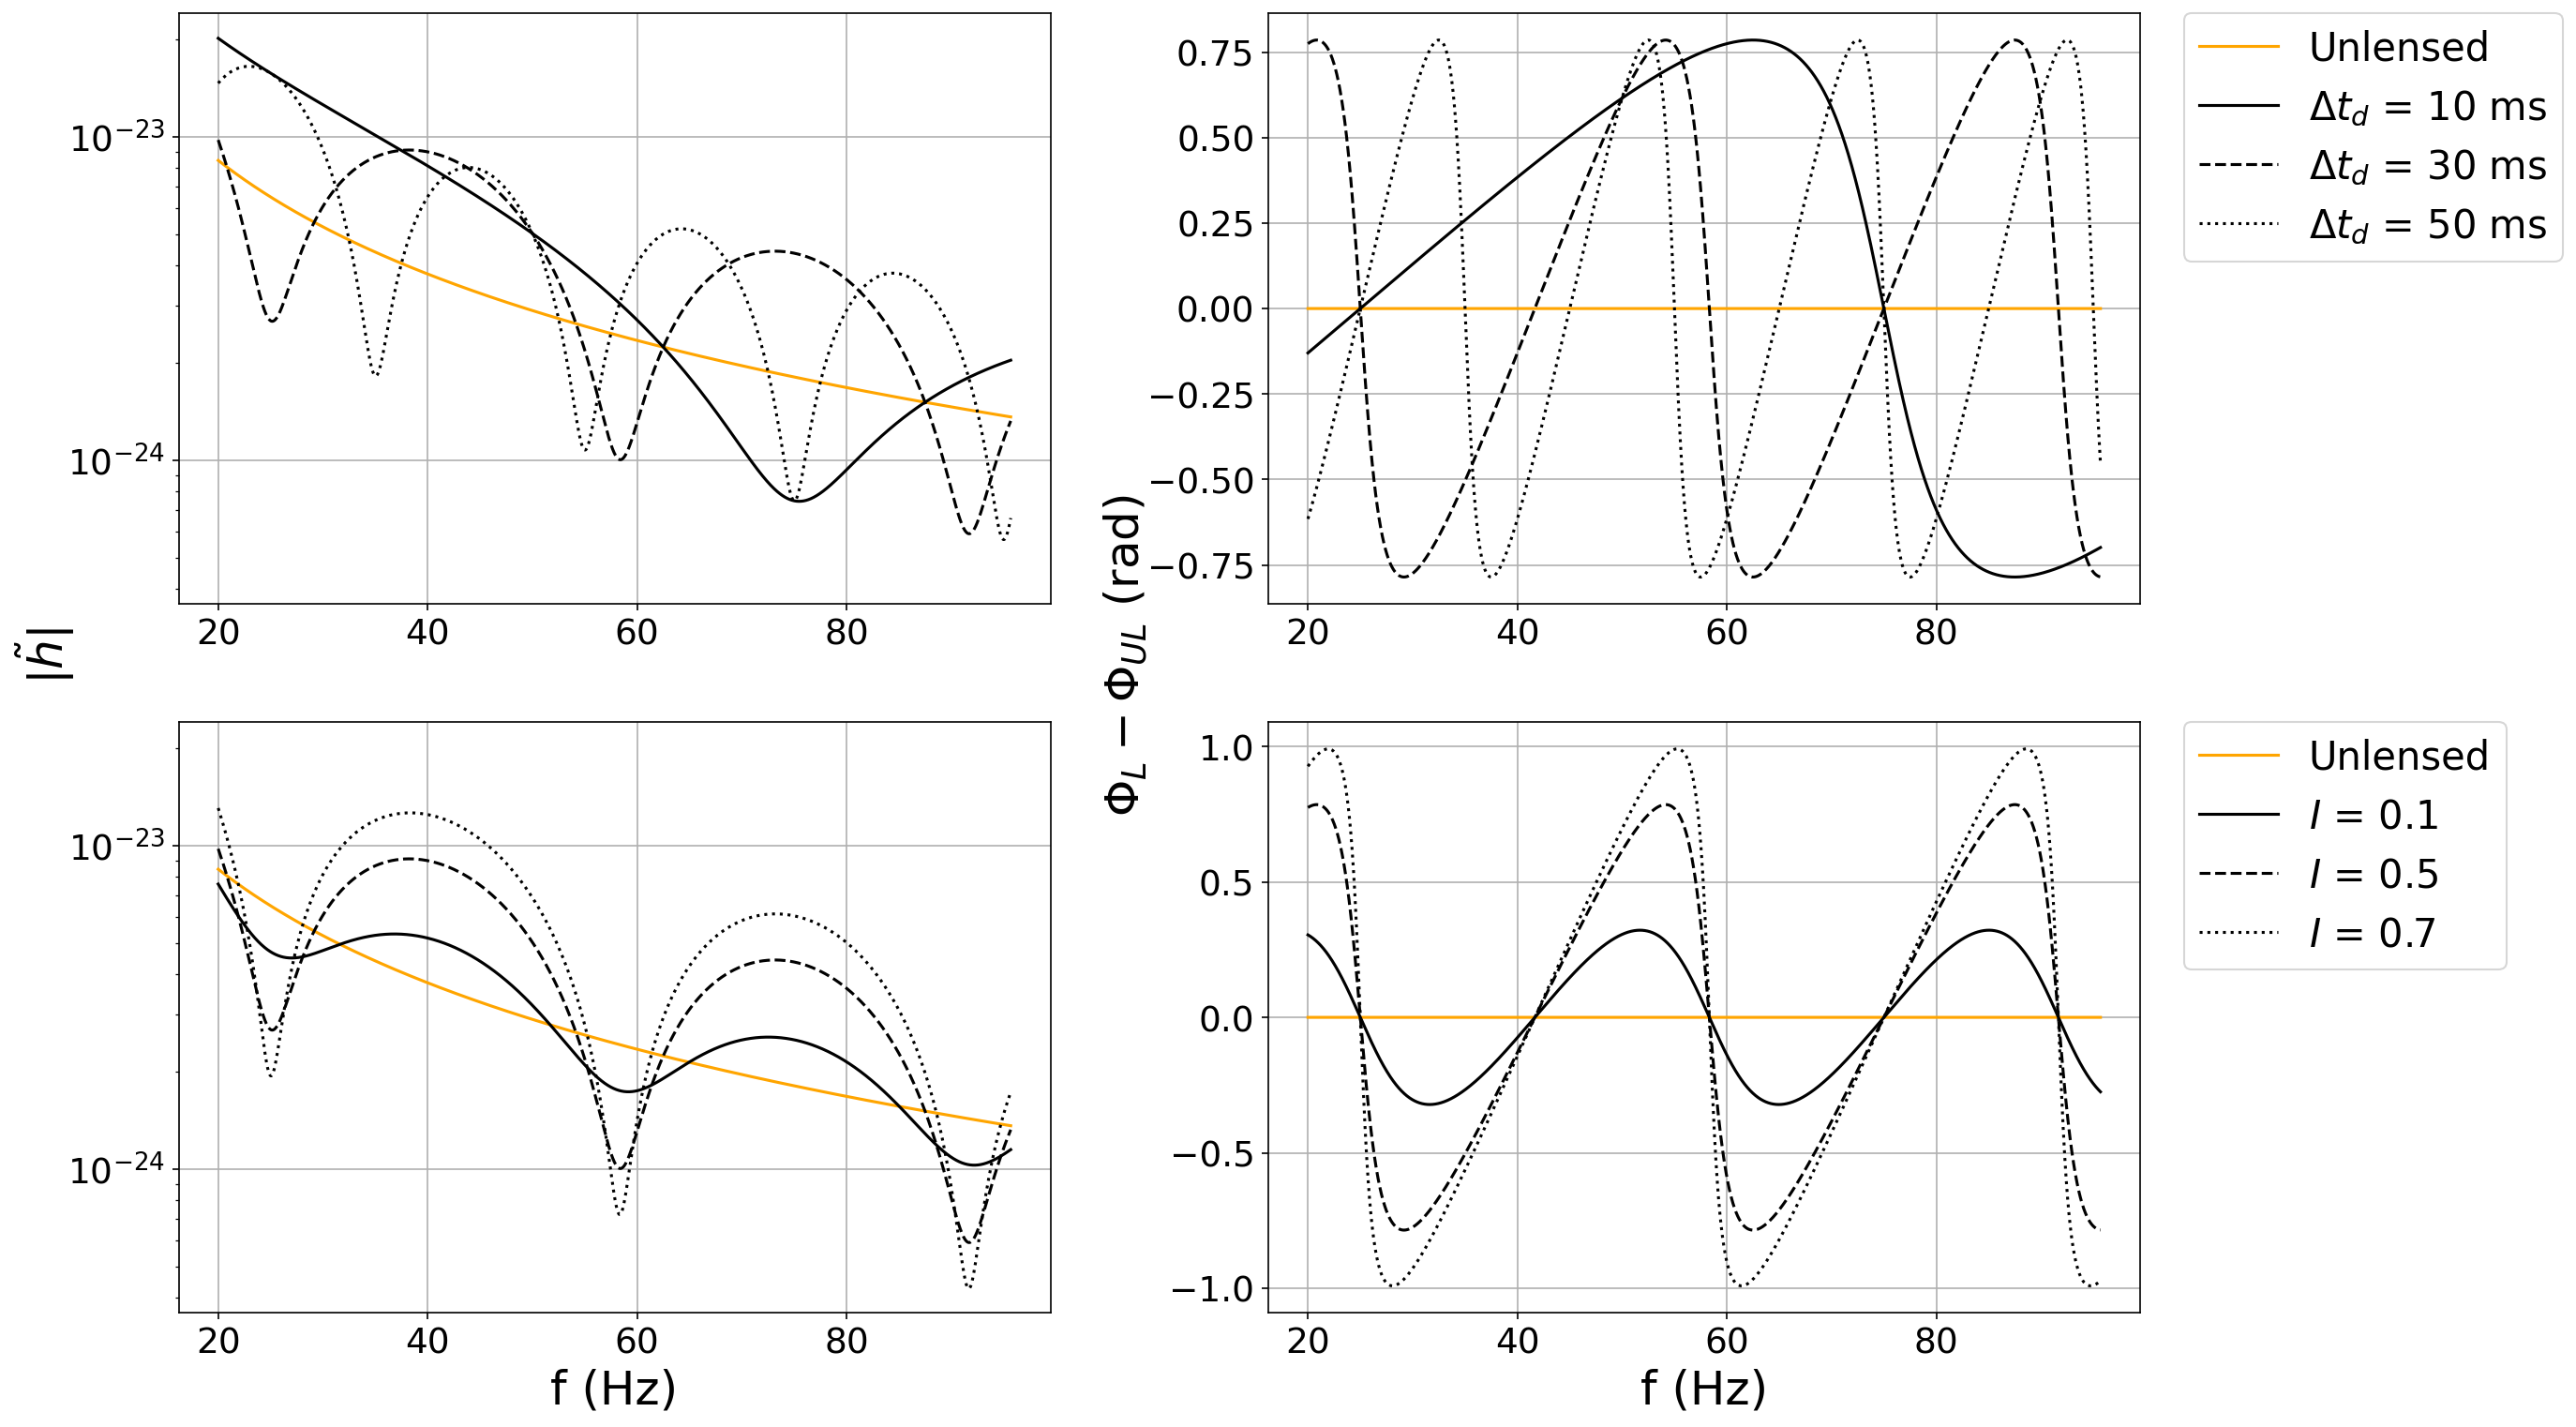

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)
line_styles = ["-", "--", ":"]  # Solid, dashed, dotted

# plot amplification and phase diff for different values of time delay but same I side by side
lens_params = lens_params_1.copy()
td_arr = np.array([0.01, 0.03, 0.05])
MLz_arr = get_MLz_from_td(td_arr, def_y)

for i, MLz in enumerate(MLz_arr):
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_arr = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_arr)
    Delta_td = lens_inst.td()
    unlensed_strain = lens_inst.hI(f_arr)
    lensed_strain = lens_inst.strain(f_arr)

    if i == 0:
        axes[0, 0].plot(
            f_arr, np.abs(unlensed_strain), ls="-", color="orange", label="Unlensed"
        )
        axes[0, 1].plot(
            f_arr, np.zeros_like(f_arr), ls="-", color="orange", label="Unlensed"
        )

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL

    axes[0, 0].plot(
        f_arr,
        np.abs(lensed_strain),
        ls=line_styles[i],
        color="black",
        label=r"$\Delta t_d$ = {:.2g} ms".format(Delta_td * 1000),
    )
    axes[0, 1].plot(
        f_arr,
        phase_diff,
        ls=line_styles[i],
        color="black",
        label=r"$\Delta t_d$ = {:.2g} ms".format(Delta_td * 1000),
    )

####################################################################################################

# plot amplification and phase diff for different values of I but same time delay side by side
lens_params = lens_params_1.copy()
I_arr = np.array([0.1, 0.5, 0.7])
y_arr = get_y_from_I(I_arr)
MLz_arr = get_MLz_from_td(def_td, y_arr)

for i in range(len(y_arr)):
    lens_params["y"] = y_arr[i]
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_arr = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_arr)
    I = lens_inst.I()
    unlensed_strain = lens_inst.hI(f_arr)
    lensed_strain = lens_inst.strain(f_arr)

    if i == 0:
        axes[1, 0].plot(
            f_arr, np.abs(unlensed_strain), ls="-", color="orange", label="Unlensed"
        )
        axes[1, 1].plot(
            f_arr, np.zeros_like(f_arr), ls="-", color="orange", label="Unlensed"
        )

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL

    axes[1, 0].plot(
        f_arr,
        np.abs(lensed_strain),
        ls=line_styles[i],
        color="black",
        label="$I$ = {:.2g}".format(I),
    )
    axes[1, 1].plot(
        f_arr,
        phase_diff,
        ls=line_styles[i],
        color="black",
        label="$I$ = {:.2g}".format(I),
    )

####################################################################################################

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h}|$", va="center", rotation="vertical", fontsize=24)
fig.text(
    0.49,
    0.5,
    r"$\Phi_L - \Phi_{UL}$ (rad)",
    va="center",
    rotation="vertical",
    fontsize=24,
)
customize_2x2_axes(axes)

# fig.savefig("../figures/waveforms_lensed.pdf", bbox_inches="tight")

# precessing

## random

system 3 in Taman's paper


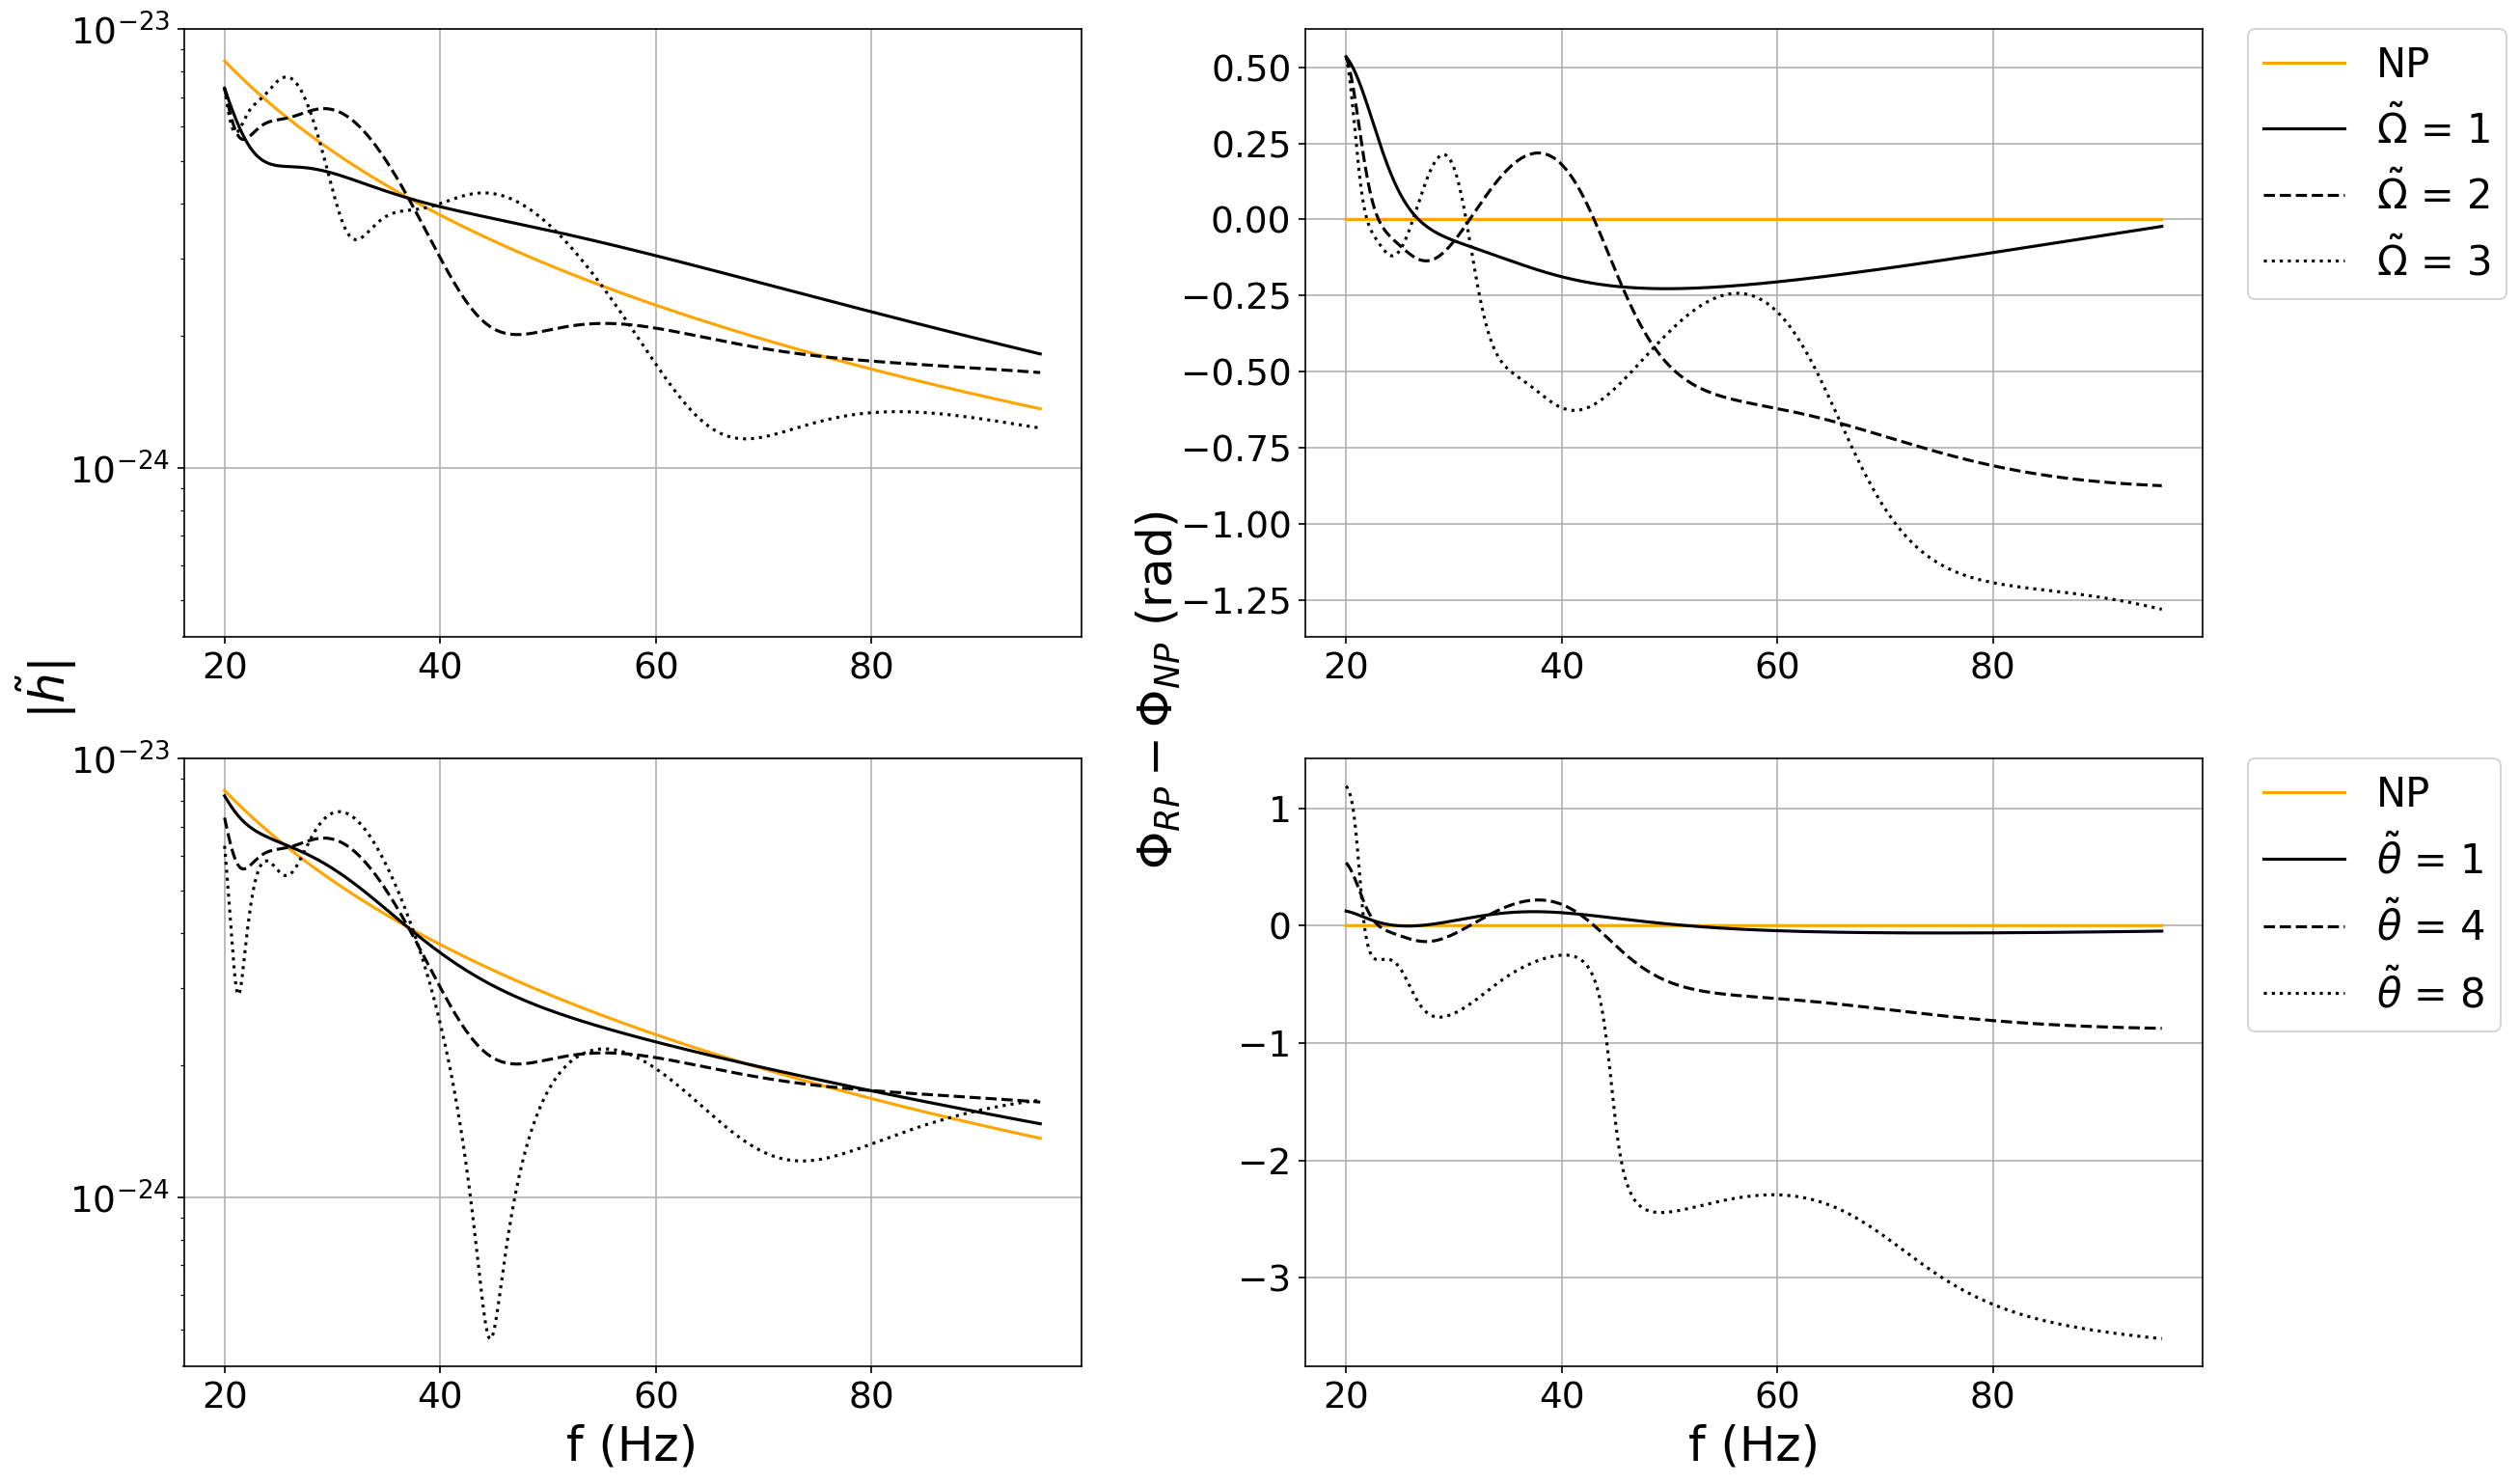

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)
line_styles = ["-", "--", ":"]  # Solid, dashed, dotted

RP_params, NP_params = set_to_params(RP_params_1, NP_params_1)
RP_params["omega_tilde"] = 2
theta_tilde_arr = np.array([1, 4, 8])

for i, theta_tilde in enumerate(theta_tilde_arr):
    RP_params["theta_tilde"] = theta_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_arr = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_arr)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_inst = Precessing(NP_params)
    NP_strain = NP_inst.strain(f_arr)
    phase_NP = np.unwrap(np.angle(NP_strain))

    if i == 0:
        axes[1, 0].plot(f_arr, np.abs(NP_strain), label="NP", color="orange", ls="-")
        axes[1, 1].plot(f_arr, np.zeros_like(f_arr), label="NP", color="orange", ls="-")

    phase_diff = phase_RP - phase_NP

    axes[1, 0].plot(
        f_arr,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color="black",
        ls=line_styles[i % len(line_styles)],
    )
    axes[1, 1].plot(
        f_arr,
        phase_diff,
        label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color="black",
        ls=line_styles[i % len(line_styles)],
    )

####################################################################################################

RP_params, NP_params = set_to_params(RP_params_1, NP_params_1)
RP_params["theta_tilde"] = 4
omega_tilde_arr = np.array([1, 2, 3])

for i, omega_tilde in enumerate(omega_tilde_arr):
    RP_params["omega_tilde"] = omega_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_arr = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_arr)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_inst = Precessing(NP_params)
    NP_strain = NP_inst.strain(f_arr)
    phase_NP = np.unwrap(np.angle(NP_strain))

    if i == 0:
        axes[0, 0].plot(f_arr, np.abs(NP_strain), label="NP", color="orange", ls="-")
        axes[0, 1].plot(f_arr, np.zeros_like(f_arr), label="NP", color="orange", ls="-")

    phase_diff = phase_RP - phase_NP

    axes[0, 0].plot(
        f_arr,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color="black",
        ls=line_styles[i % len(line_styles)],
    )
    axes[0, 1].plot(
        f_arr,
        phase_diff,
        label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color="black",
        ls=line_styles[i % len(line_styles)],
    )

####################################################################################################

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h}|$", va="center", rotation="vertical", fontsize=24)
fig.text(
    0.49,
    0.5,
    r"$\Phi_{RP} - \Phi_{NP}$ (rad)",
    va="center",
    rotation="vertical",
    fontsize=24,
)
customize_2x2_axes(axes)
print("system 3 in Taman's paper")

# fig.savefig("../figures/waveforms_RP.pdf", bbox_inches="tight")

## edge-on

system 2 in Taman's paper


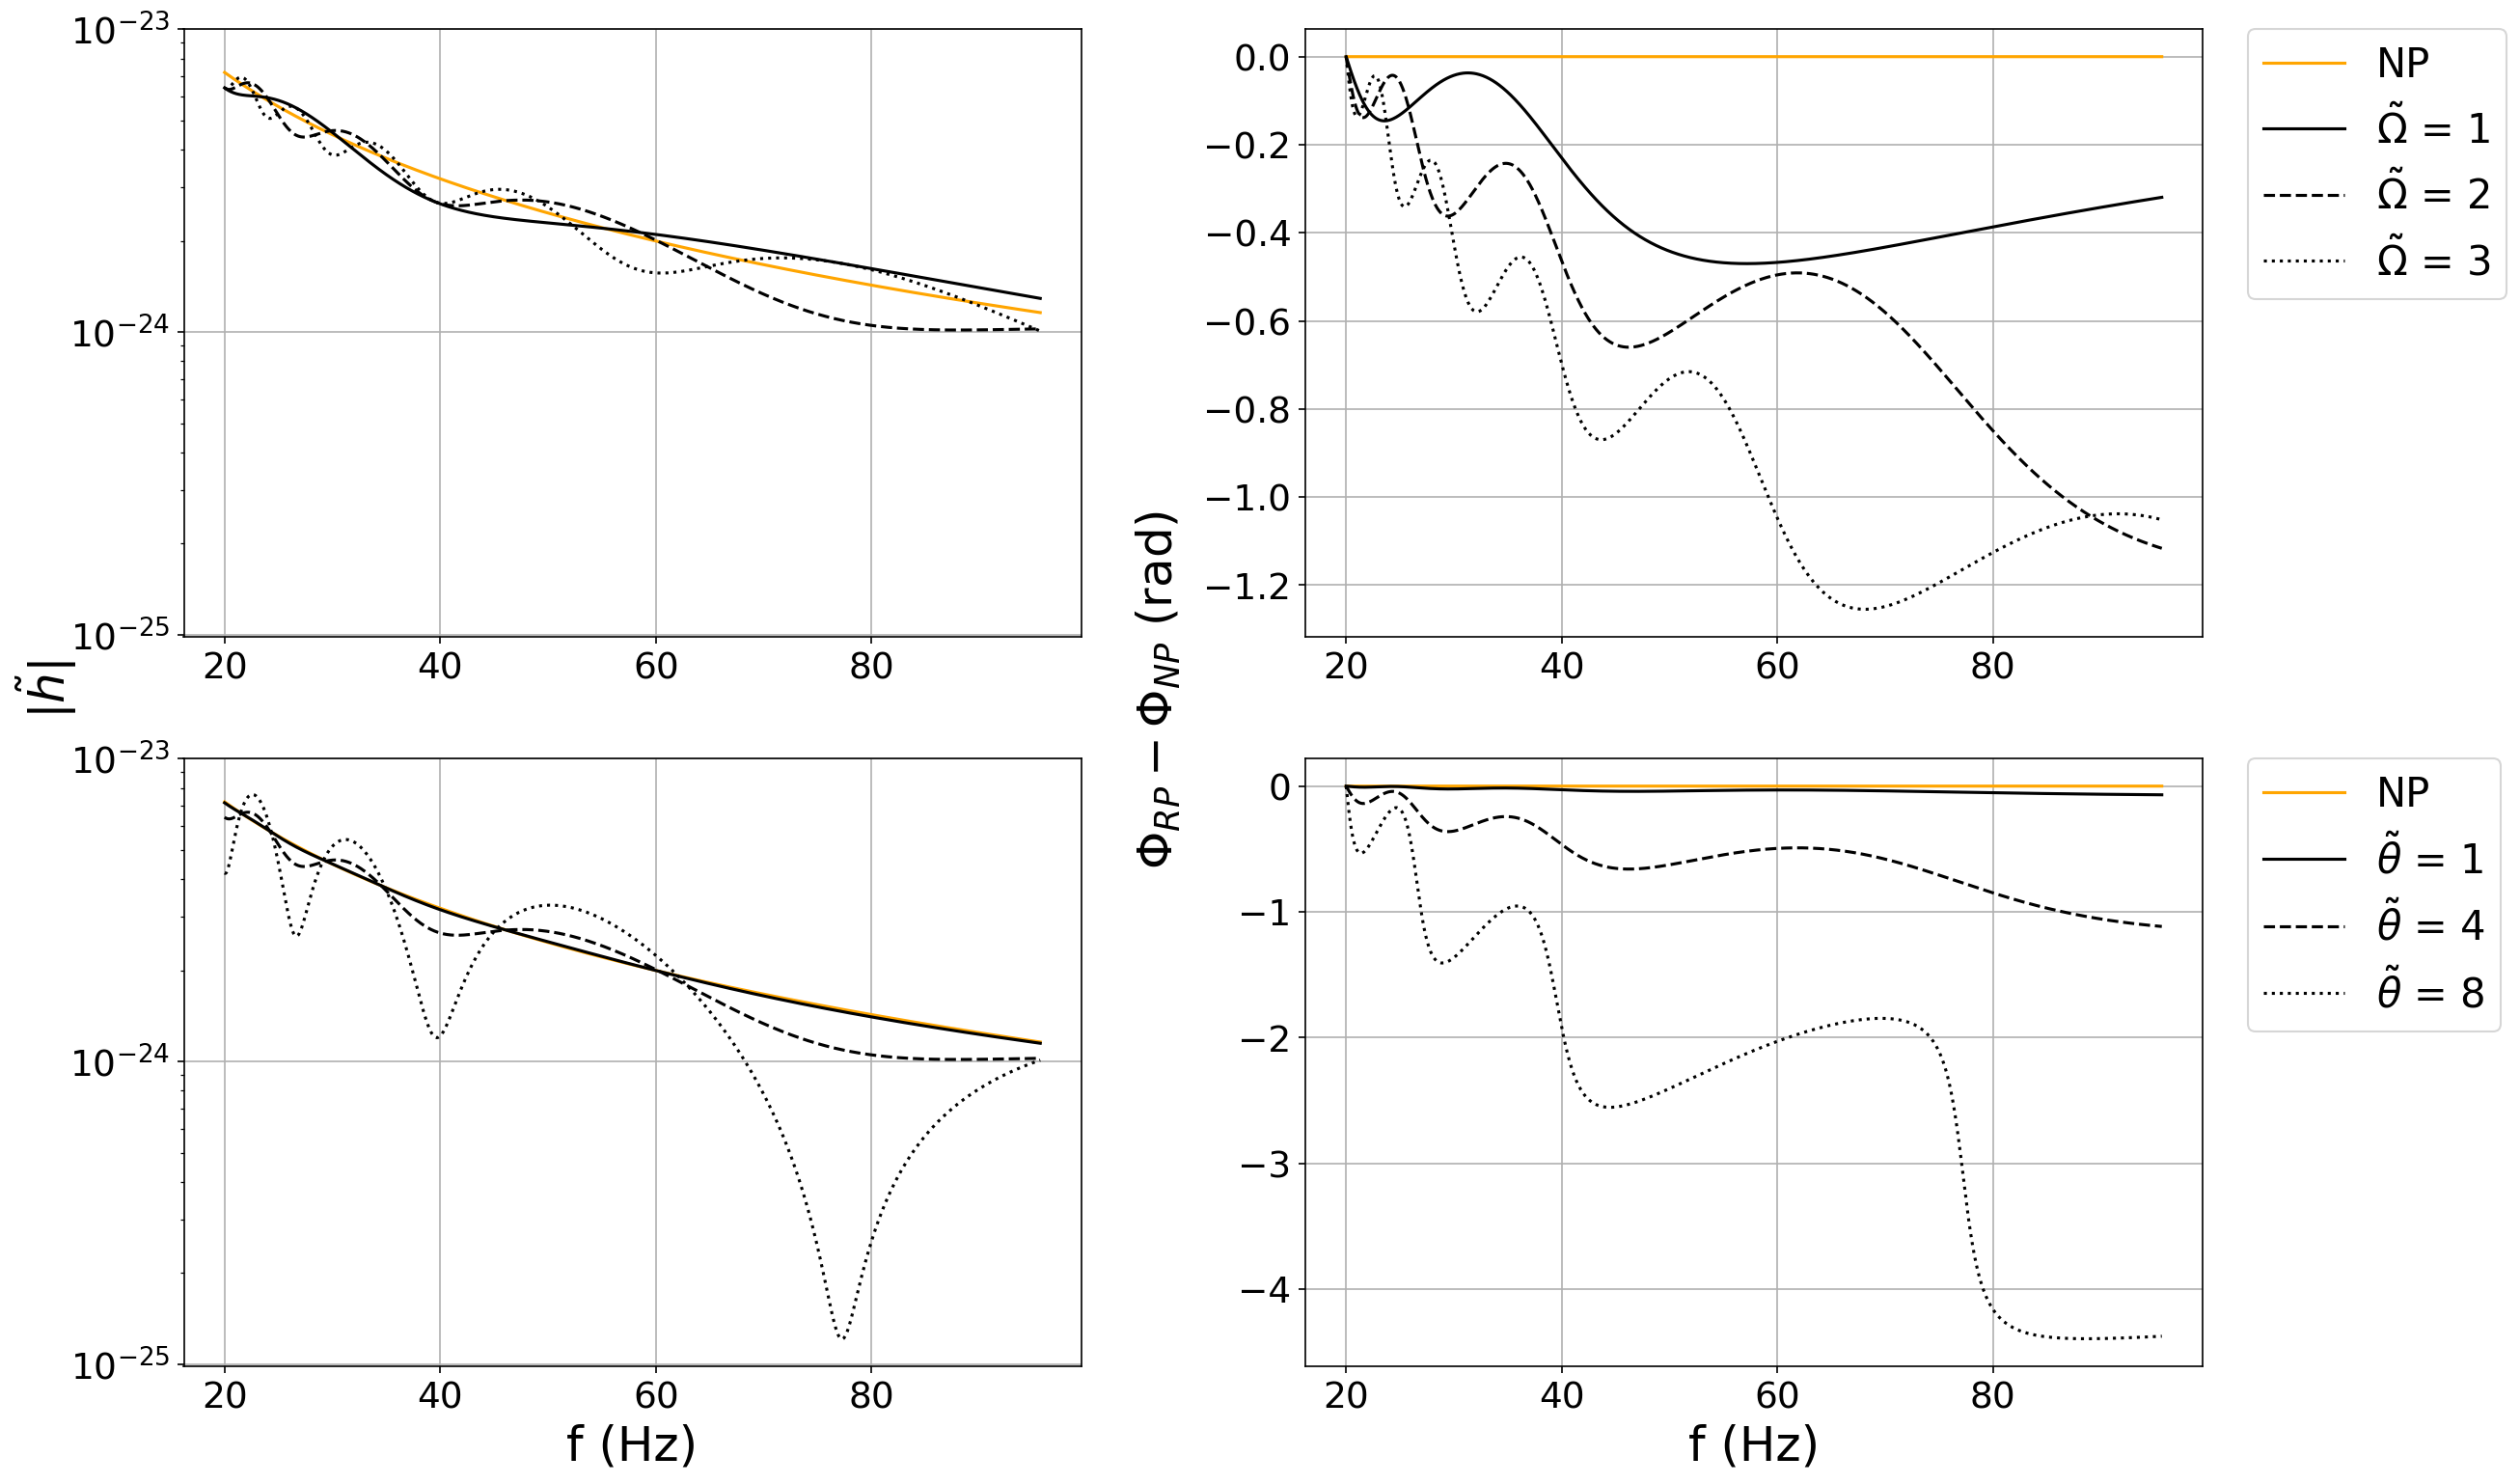

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)
line_styles = ["-", "--", ":"]  # Solid, dashed, dotted

RP_params, NP_params = set_to_params(RP_params_1, NP_params_1)
RP_params["omega_tilde"] = 2
theta_tilde_arr = np.array([1, 4, 8])

for i, theta_tilde in enumerate(theta_tilde_arr):
    RP_params["theta_tilde"] = theta_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_arr = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_arr)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_inst = Precessing(NP_params)
    NP_strain = NP_inst.strain(f_arr)
    phase_NP = np.unwrap(np.angle(NP_strain))

    if i == 0:
        axes[1, 0].plot(f_arr, np.abs(NP_strain), label="NP", color="orange", ls="-")
        axes[1, 1].plot(f_arr, np.zeros_like(f_arr), label="NP", color="orange", ls="-")

    phase_diff = phase_RP - phase_NP

    axes[1, 0].plot(
        f_arr,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color="black",
        ls=line_styles[i % len(line_styles)],
    )
    axes[1, 1].plot(
        f_arr,
        phase_diff,
        label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color="black",
        ls=line_styles[i % len(line_styles)],
    )

####################################################################################################

RP_params, NP_params = set_to_params(RP_params_1, NP_params_1)
RP_params["theta_tilde"] = 4
omega_tilde_arr = np.array([1, 2, 3])

for i, omega_tilde in enumerate(omega_tilde_arr):
    RP_params["omega_tilde"] = omega_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_arr = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_arr)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_inst = Precessing(NP_params)
    NP_strain = NP_inst.strain(f_arr)
    phase_NP = np.unwrap(np.angle(NP_strain))

    if i == 0:
        axes[0, 0].plot(f_arr, np.abs(NP_strain), label="NP", color="orange", ls="-")
        axes[0, 1].plot(f_arr, np.zeros_like(f_arr), label="NP", color="orange", ls="-")

    phase_diff = phase_RP - phase_NP

    axes[0, 0].plot(
        f_arr,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color="black",
        ls=line_styles[i % len(line_styles)],
    )
    axes[0, 1].plot(
        f_arr,
        phase_diff,
        label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color="black",
        ls=line_styles[i % len(line_styles)],
    )

####################################################################################################

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h}|$", va="center", rotation="vertical", fontsize=24)
fig.text(
    0.49,
    0.5,
    r"$\Phi_{RP} - \Phi_{NP}$ (rad)",
    va="center",
    rotation="vertical",
    fontsize=24,
)
customize_2x2_axes(axes)
print("system 2 in Taman's paper")

# fig.savefig("../figures/waveforms_RP.pdf", bbox_inches="tight")

## face-on

system 1 in Taman's paper


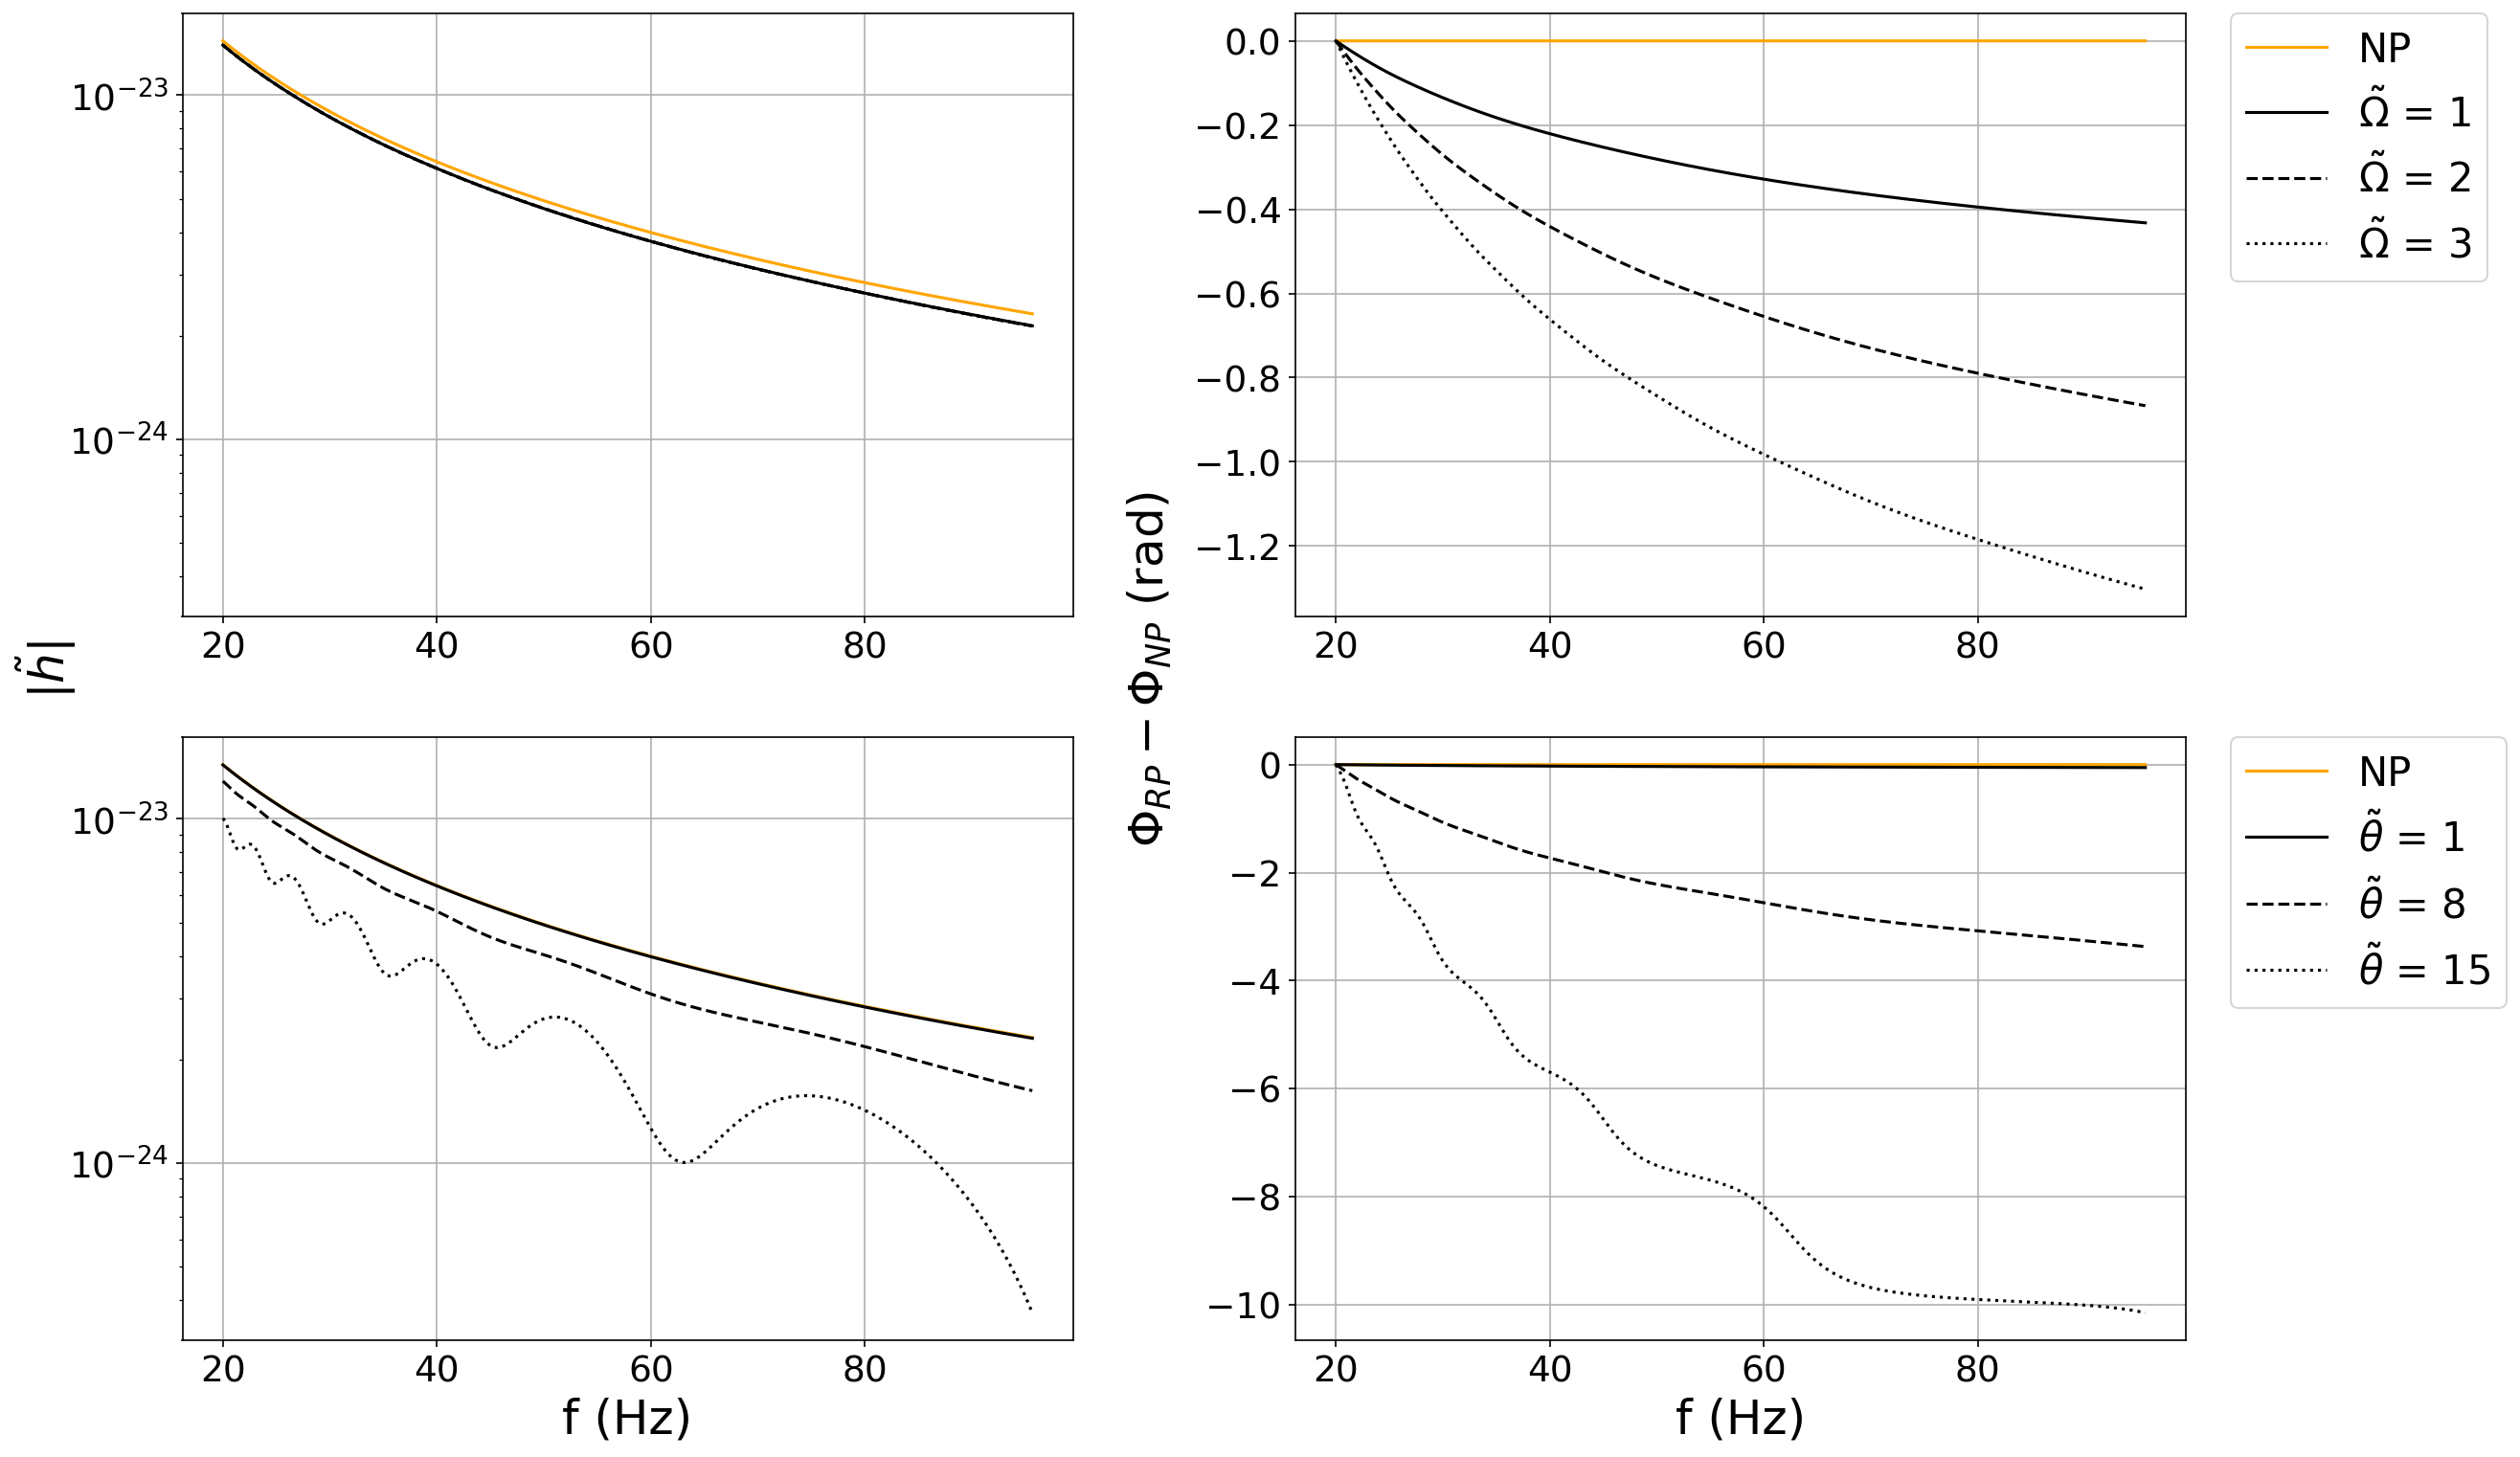

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)
line_styles = ["-", "--", ":"]  # Solid, dashed, dotted

RP_params, NP_params = set_to_params(RP_params_1, NP_params_1)
RP_params["omega_tilde"] = 2
theta_tilde_arr = np.array([1, 8, 15])

for i, theta_tilde in enumerate(theta_tilde_arr):
    RP_params["theta_tilde"] = theta_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_arr = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_arr)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_inst = Precessing(NP_params)
    NP_strain = NP_inst.strain(f_arr)
    phase_NP = np.unwrap(np.angle(NP_strain))

    if i == 0:
        axes[1, 0].plot(f_arr, np.abs(NP_strain), label="NP", color="orange", ls="-")
        axes[1, 1].plot(f_arr, np.zeros_like(f_arr), label="NP", color="orange", ls="-")

    phase_diff = phase_RP - phase_NP

    axes[1, 0].plot(
        f_arr,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color="black",
        ls=line_styles[i % len(line_styles)],
    )
    axes[1, 1].plot(
        f_arr,
        phase_diff,
        label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color="black",
        ls=line_styles[i % len(line_styles)],
    )

####################################################################################################

RP_params, NP_params = set_to_params(RP_params_1, NP_params_1)
RP_params["theta_tilde"] = 4
omega_tilde_arr = np.array([1, 2, 3])

for i, omega_tilde in enumerate(omega_tilde_arr):
    RP_params["omega_tilde"] = omega_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_arr = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_arr)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_inst = Precessing(NP_params)
    NP_strain = NP_inst.strain(f_arr)
    phase_NP = np.unwrap(np.angle(NP_strain))

    if i == 0:
        axes[0, 0].plot(f_arr, np.abs(NP_strain), label="NP", color="orange", ls="-")
        axes[0, 1].plot(f_arr, np.zeros_like(f_arr), label="NP", color="orange", ls="-")

    phase_diff = phase_RP - phase_NP

    axes[0, 0].plot(
        f_arr,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color="black",
        ls=line_styles[i % len(line_styles)],
    )
    axes[0, 1].plot(
        f_arr,
        phase_diff,
        label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color="black",
        ls=line_styles[i % len(line_styles)],
    )

####################################################################################################

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h}|$", va="center", rotation="vertical", fontsize=24)
fig.text(
    0.49,
    0.5,
    r"$\Phi_{RP} - \Phi_{NP}$ (rad)",
    va="center",
    rotation="vertical",
    fontsize=24,
)
customize_2x2_axes(axes)
print("system 1 in Taman's paper")

# fig.savefig("../figures/waveforms_RP.pdf", bbox_inches="tight")